## Alternative preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Importing the dataset
dataset = pd.read_excel('IDataset_adj.xlsx')
X = dataset[['Explosive type', 'Explosive mass', 'Standoff distance']]
y = dataset['Peak impulse']
feature_names = X.columns
print (X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Explosive type'])], remainder='passthrough')
X = ct.fit_transform(X)

#Getting the feature names
new_feature_names = ct.get_feature_names_out(feature_names)
print (X)

features = ['Explosive type-CompB', 'Explosive type-TNT', 'Explosive mass', 'Standoff distance']
#Turning back into a dataframe
X = pd.DataFrame(X, columns= features)
print (X)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)
print (X_train)

    Explosive type  Explosive mass  Standoff distance
0              TNT             0.5                1.0
1              TNT             0.5                1.5
2              TNT             0.5                2.5
3              TNT             0.5                3.5
4              TNT             0.5                4.5
..             ...             ...                ...
583  Composition B            25.0               19.5
584  Composition B            25.0               20.0
585  Composition B            25.0                2.5
586  Composition B            25.0                3.5
587  Composition B            25.0                4.5

[588 rows x 3 columns]
[[ 0.   1.   0.5  1. ]
 [ 0.   1.   0.5  1.5]
 [ 0.   1.   0.5  2.5]
 ...
 [ 1.   0.  25.   2.5]
 [ 1.   0.  25.   3.5]
 [ 1.   0.  25.   4.5]]
     Explosive type-CompB  Explosive type-TNT  Explosive mass  \
0                     0.0                 1.0             0.5   
1                     0.0                 1.0         

## Training the XGB Regression model on the Training set

In [3]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 1300,
                         max_depth = 3,
                         gamma = 0.001, 
                         learning_rate = 0.2,
                         random_state = 55)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1300, n_jobs=None,
             num_parallel_tree=None, random_state=55, ...)

## Predicting the Test set results

In [4]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)
print(file)

[[ 53.33  52.52]
 [282.26 284.67]
 [ 85.17  87.55]
 [  6.15   5.86]
 [169.83 169.2 ]
 [254.03 254.99]
 [239.36 244.78]
 [163.52 164.29]
 [117.1  116.46]
 [298.64 302.16]
 [ 30.06  30.1 ]
 [ 60.09  59.78]
 [ 85.29  84.28]
 [ 52.33  53.34]
 [245.02 242.96]
 [387.   392.18]
 [115.88 116.31]
 [ 22.05  21.94]
 [100.95 101.33]
 [261.87 262.29]
 [146.58 147.37]
 [120.99 121.86]
 [157.75 149.09]
 [ 17.34  17.69]
 [209.57 207.52]
 [ 76.51  77.58]
 [155.65 155.13]
 [148.6  148.77]
 [ 51.89  51.24]
 [160.89 159.3 ]
 [175.63 174.18]
 [ 31.38  31.08]
 [ 14.63  15.01]
 [ 38.03  37.87]
 [ 38.88  38.96]
 [ 39.7   39.29]
 [ 94.99  95.93]
 [340.01 341.12]
 [ 60.14  60.09]
 [ 62.16  63.44]
 [ 15.99  16.39]
 [ 24.67  25.14]
 [ 54.67  56.02]
 [ 78.59  77.68]
 [153.29 154.01]
 [ 38.3   37.99]
 [125.63 126.69]
 [  4.4    4.67]
 [100.24 105.09]
 [107.9  107.37]
 [295.43 293.02]
 [177.33 177.96]
 [ 93.75  93.68]
 [ 46.58  48.54]
 [ 99.98  99.87]
 [ 46.67  47.89]
 [ 11.    11.41]
 [252.58 249.25]
 [ 31.59  31.1

## SHAP

In [5]:
import shap

In [6]:
# Create object that can calculate shap values for an ensemble tree model
explainer = shap.TreeExplainer(regressor)

[00:26:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [7]:
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

In [8]:
cmap = (mpl.colors.ListedColormap(['blue','orange', 'red'])
        .with_extremes(under='yellow', over='red'))

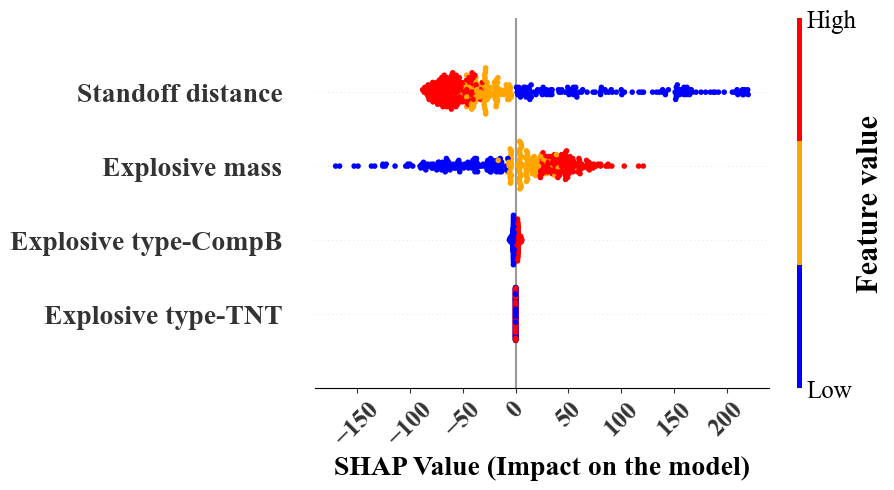

In [10]:
#Summary plot type 2
shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = cmap)
# Get the current figure and axes objects.
fig = plt.gcf()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.gcf().set_size_inches(8,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20, weight='bold')
plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 18,weight='bold', rotation=45)

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=18)
cb_ax.set_ylabel("Feature value", fontsize=22, weight='bold')
plt.savefig('Images/SHAP1.png', dpi = 600, bbox_inches = 'tight')
plt.show()

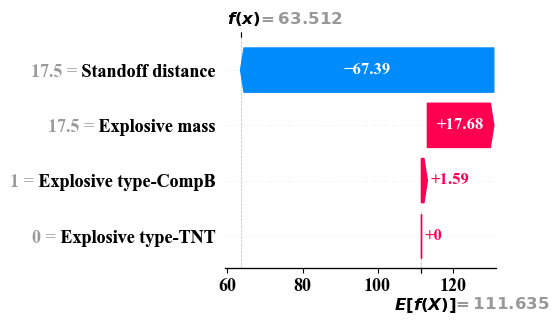

In [31]:
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(regressor.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)
shap.waterfall_plot(shap_values2[96], show=False)
plt.gcf()
plt.gcf().set_size_inches(3.5,3)
plt.rcParams['font.weight'] = 'bold'

plt.savefig('Images/SHAP2.png', dpi = 600, bbox_inches = 'tight')
plt.show()

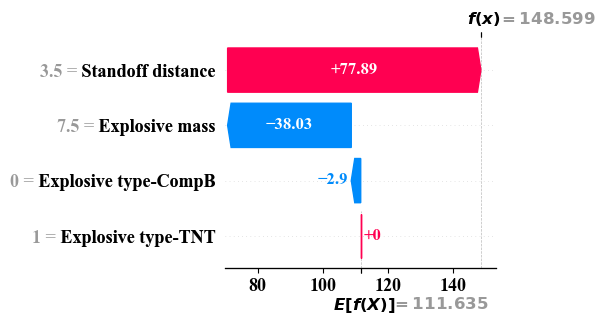

In [39]:
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(regressor.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)
shap.waterfall_plot(shap_values2[27], show=False)
plt.gcf()
plt.gcf().set_size_inches(3.5,3)
plt.rcParams['font.weight'] = 'bold'

plt.savefig('Images/SHAP3.png', dpi = 600, bbox_inches = 'tight')
plt.show()

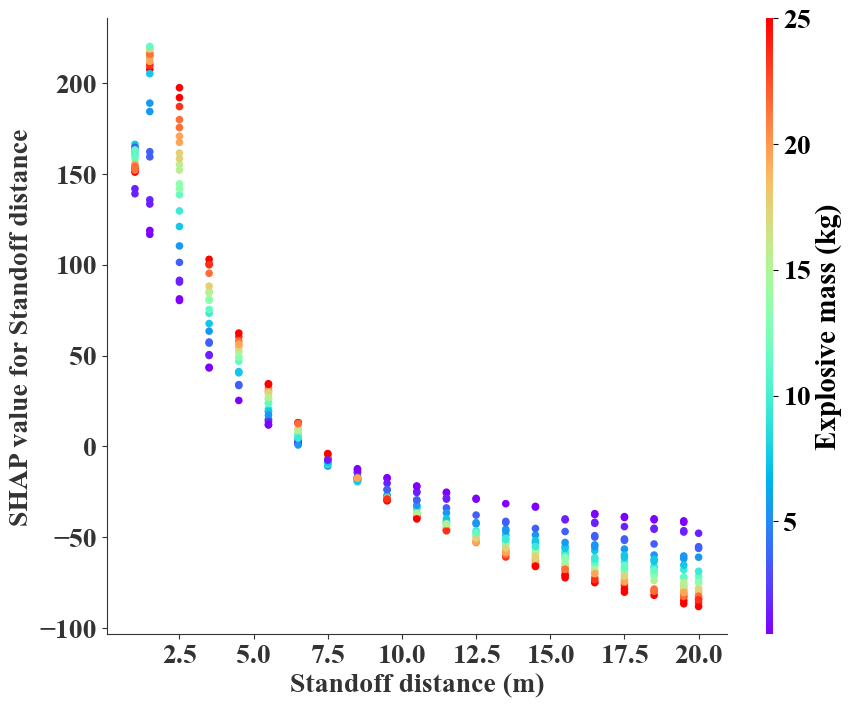

In [28]:
#Partial Dependenace Plot
shap.dependence_plot(3, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig1 = plt.gcf()
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Standoff distance", fontsize = 20,weight='bold')
plt.xlabel("Standoff distance (m)",fontsize = 20,weight='bold')
plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 20,weight='bold')
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax1 = fig1.axes[1] 

# Modifying color bar parameters
cb_ax1.tick_params(labelsize=20)
cb_ax1.set_ylabel("Explosive mass (kg)", fontsize=21, weight='bold')
plt.savefig('Images/SHAP4.png', dpi = 600, bbox_inches = 'tight')
plt.show()

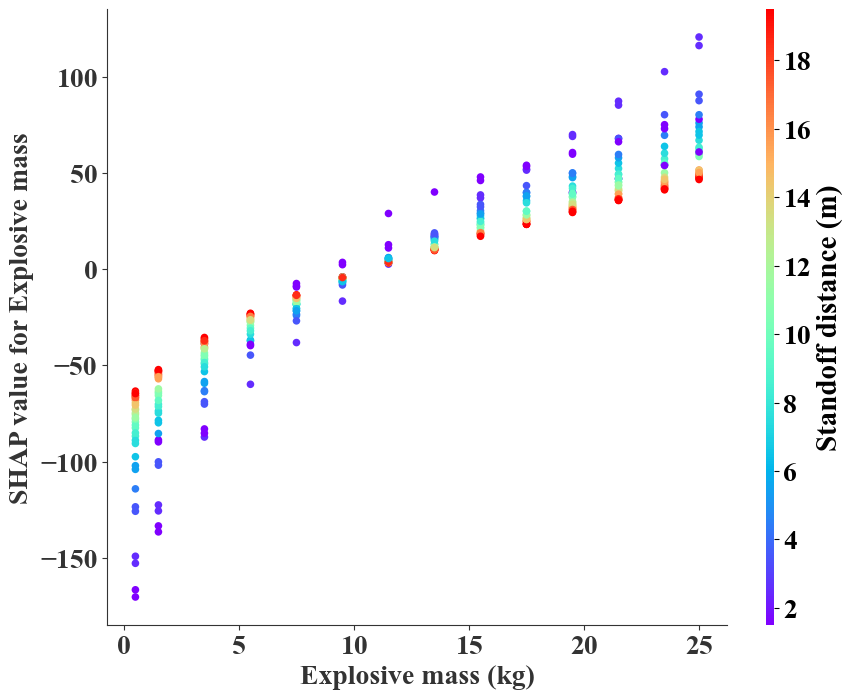

In [29]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig2 = plt.gcf()
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Explosive mass", fontsize = 20,weight='bold')
plt.xlabel("Explosive mass (kg)",fontsize = 20,weight='bold')
plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 20,weight='bold')
# Get colorbar
cb_ax2 = fig2.axes[1] 

# Modifying color bar parameters
cb_ax2.tick_params(labelsize=20)
cb_ax2.set_ylabel("Standoff distance (m)", fontsize=21, weight='bold')
plt.savefig('Images/SHAP5.png', dpi = 600, bbox_inches = 'tight')
plt.show()

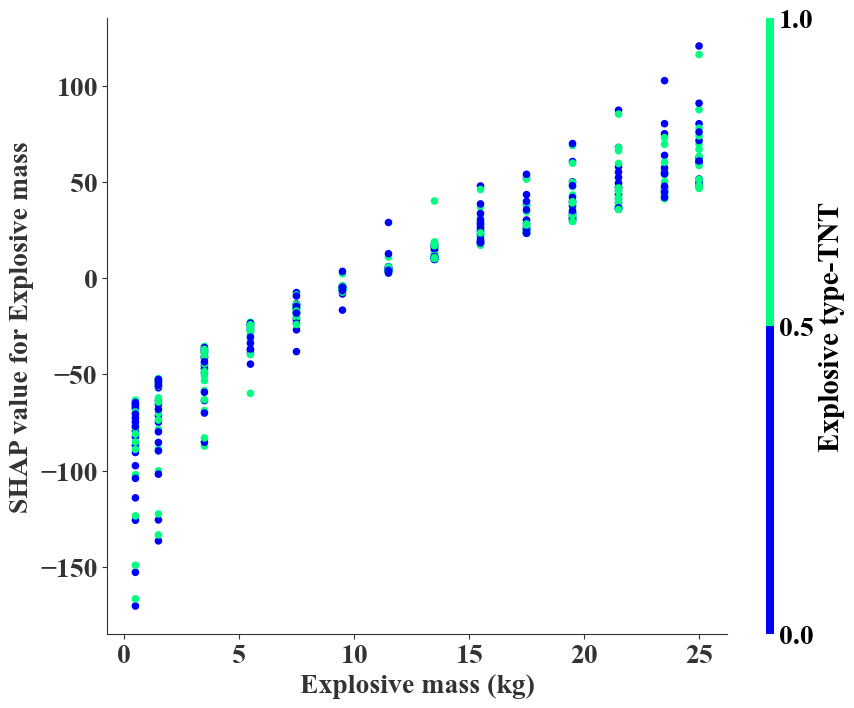

In [30]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, interaction_index = 1, show=False, dot_size = 30, cmap=plt.get_cmap("winter"))
fig3 = plt.gcf()
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Explosive mass", fontsize = 20,weight='bold')
plt.xlabel("Explosive mass (kg)",fontsize = 20,weight='bold')
plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 20,weight='bold')
#plt.grid (visible = True, which = 'major', axis = 'y')
# Get colorbar
cb_ax3 = fig3.axes[1] 

# Modifying color bar parameters
cb_ax3.tick_params(labelsize=20)
cb_ax3.set_ylabel("Explosive type-TNT", fontsize=21, weight='bold')
plt.savefig('Images/SHAP6.png', dpi = 600, bbox_inches = 'tight')
plt.show()